# Course Project: Airplane Pricing
### Nicholas Thomson

Research Question: What factors influence airplane ticket prices within a country?

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Dataset taken from: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

In [2]:
df = pd.read_csv("Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
airline_count = df['airline'].value_counts()
airline_count

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

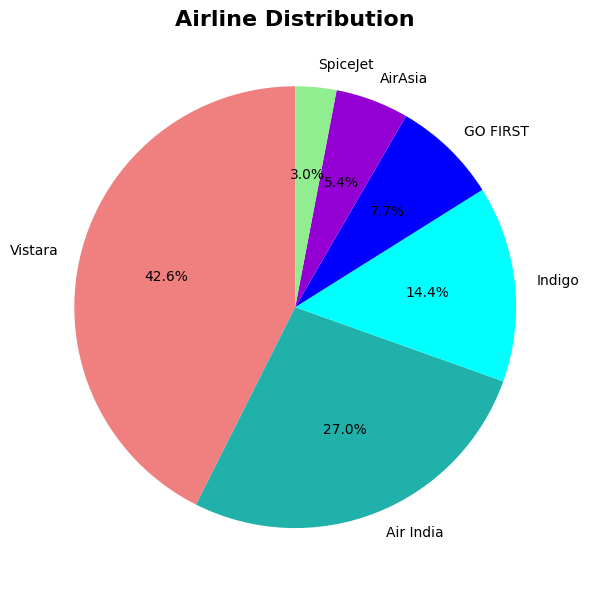

In [4]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(airline_count, labels=['Vistara', 'Air India', 'Indigo', 'GO FIRST', 'AirAsia', 'SpiceJet'], autopct='%1.1f%%', startangle=90, shadow=False, colors=['lightcoral', 'lightseagreen', 'cyan', 'blue', 'darkviolet', 'lightgreen'])
# We use autopct to display the percentage on each slice, startangle to set the starting angle of the pie chart, and shadow=True for a shadow effect.
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Airline Distribution', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the pie chart
plt.show()

In [5]:
destination_count = df['destination_city'].value_counts()
destination_count

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [6]:
source_count = df['source_city'].value_counts()
source_count

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

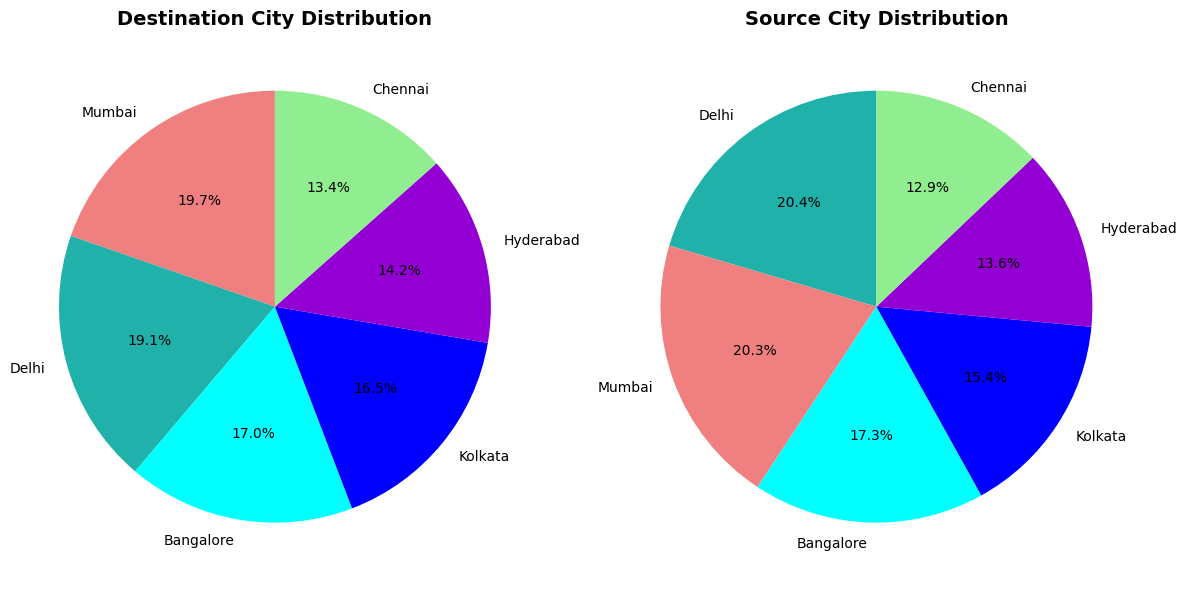

In [7]:
# Create subplots for two pie charts side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart 1: Departure time distribution
axs[0].pie(destination_count, labels=destination_count.index, autopct='%1.1f%%', startangle=90, shadow=False, colors=['lightcoral', 'lightseagreen', 'cyan', 'blue', 'darkviolet', 'lightgreen'])
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
axs[0].set_title('Destination City Distribution', fontsize=14, fontweight='bold')

# Pie chart 2: Arrival time distribution
axs[1].pie(source_count, labels=source_count.index, autopct='%1.1f%%', startangle=90, shadow=False, colors=['lightseagreen', 'lightcoral', 'cyan', 'blue', 'darkviolet', 'lightgreen'])
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
axs[1].set_title('Source City Distribution', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the pie charts
plt.show()

In [8]:
departure_time_count = df['departure_time'].value_counts()
departure_time_count

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [9]:
arrival_time_count = df['arrival_time'].value_counts()
arrival_time_count

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [10]:
d = {'Early_Morning': arrival_time_count['Early_Morning'], 'Morning': arrival_time_count['Morning'], 'Afternoon': arrival_time_count['Afternoon'], 'Evening': arrival_time_count['Evening'], 'Night': arrival_time_count['Night'], 'Late_Night': arrival_time_count['Late_Night']}
arrival_time_ordered = pd.Series(data=d, index=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])
arrival_time_ordered

Early_Morning    15417
Morning          62735
Afternoon        38139
Evening          78323
Night            91538
Late_Night       14001
dtype: int64

In [11]:
d = {'Early_Morning': departure_time_count['Early_Morning'], 'Morning': departure_time_count['Morning'], 'Afternoon': departure_time_count['Afternoon'], 'Evening': departure_time_count['Evening'], 'Night': departure_time_count['Night'], 'Late_Night': departure_time_count['Late_Night']}
departure_time_ordered = pd.Series(data=d, index=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])
departure_time_ordered

Early_Morning    66790
Morning          71146
Afternoon        47794
Evening          65102
Night            48015
Late_Night        1306
dtype: int64

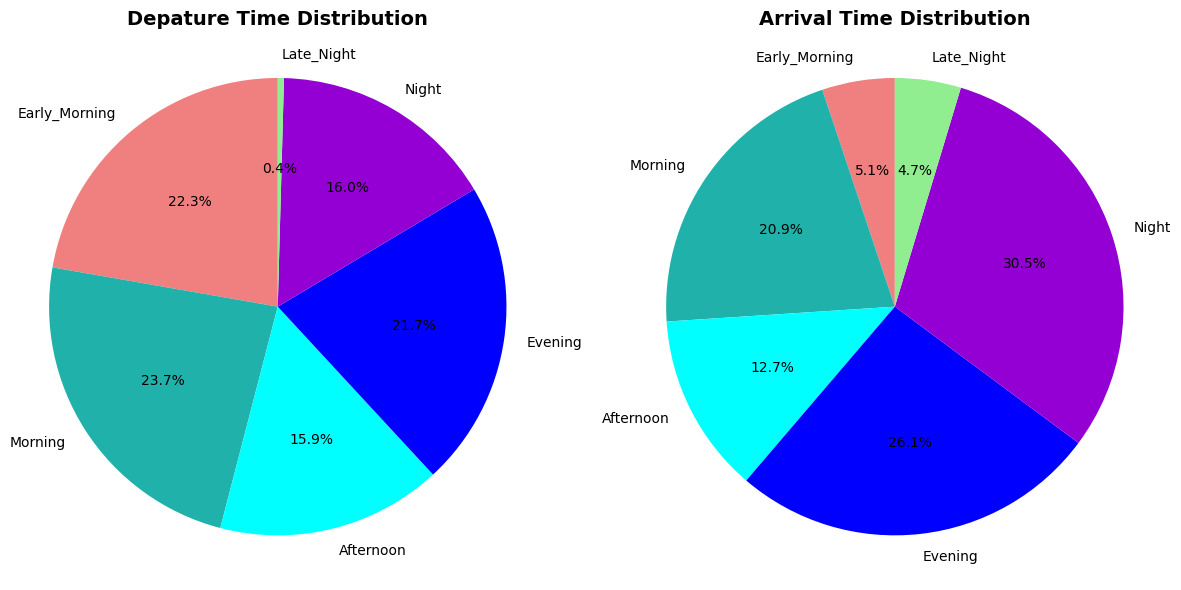

In [12]:
# Create subplots for two pie charts side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart 1: Departure time distribution
axs[0].pie(departure_time_ordered, labels=departure_time_ordered.index, autopct='%1.1f%%', startangle=90, shadow=False, colors=['lightcoral', 'lightseagreen', 'cyan', 'blue', 'darkviolet', 'lightgreen'])
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
axs[0].set_title('Depature Time Distribution', fontsize=14, fontweight='bold')

# Pie chart 2: Arrival time distribution
axs[1].pie(arrival_time_ordered, labels=arrival_time_ordered.index, autopct='%1.1f%%', startangle=90, shadow=False, colors=['lightcoral', 'lightseagreen', 'cyan', 'blue', 'darkviolet', 'lightgreen'])
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
axs[1].set_title('Arrival Time Distribution', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the pie charts
plt.show()

The dataset contains information about the airline, departure time, number of stops, arrival time, etc. as well as price of the airplane. All of this information will be used to predict the price of the flight.

The unnamed column is useless for modeling because it appears to be an index column. The flight column will also be dropped as the flight number shouldn't influence the price of the flight.

In [13]:
df = df.drop(columns=['Unnamed: 0', 'flight'])

df = pd.get_dummies(df, dtype=float)
df = df.dropna()

In [14]:
df.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Important to note: 
- The cities are all within India. The results of the model will reflect within country flying
- The price of the ticket is presumabley in Indian Rupees. I assume this because of the source and destination cities being in India, and the poster of the dataset is from India. However, the currency is not as important. Conversion between currencies is done by basic calculations, so the price is relative to the currency but consistent with any currency.

### Split dataset into dependent and depedent variables

In [15]:
X = df.drop(columns=['price'])
Y = df['price']

In [16]:
X.head()

,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2.33,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2.17,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2.25,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.33,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [17]:
Y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

### Split Dataset into training and testing

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

LinearRegression()

In [20]:
Y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Squared Error (MSE): 45720754.98
Root Mean Squared Error (RMSE): 6761.71
R-squared (R²): 0.91


In [22]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})  
print(coefficients)  

                         Feature   Coefficient
0                       duration  4.295894e+01
1                      days_left -1.304301e+02
2                airline_AirAsia -6.971738e+12
3              airline_Air_India -6.971738e+12
4               airline_GO_FIRST -6.971738e+12
5                 airline_Indigo -6.971738e+12
6               airline_SpiceJet -6.971738e+12
7                airline_Vistara -6.971738e+12
8          source_city_Bangalore -6.741559e+12
9            source_city_Chennai -6.741559e+12
10             source_city_Delhi -6.741559e+12
11         source_city_Hyderabad -6.741559e+12
12           source_city_Kolkata -6.741559e+12
13            source_city_Mumbai -6.741559e+12
14      departure_time_Afternoon  6.447924e+12
15  departure_time_Early_Morning  6.447924e+12
16        departure_time_Evening  6.447924e+12
17     departure_time_Late_Night  6.447924e+12
18        departure_time_Morning  6.447924e+12
19          departure_time_Night  6.447924e+12
20           

In [23]:
# Fit the linear regression model on the data
model = sm.OLS(Y, X).fit()

# Get regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.030e+05
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:32:30   Log-Likelihood:            -3.0726e+06
No. Observations:              300153   AIC:                         6.145e+06
Df Residuals:                  300122   BIC:                         6.146e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
duration        

**R-squared (R²):** This is 0.911, indicating the regression model is highly relevant to explaining airplane prices

**F-statistic:** The F-Statistic is high, suggesting the model is very significant to predicting airplane ticket prices

**Prob (F-statistic):** The value is zero, suggesting the model is significant

## Coefficients

- It would be cheaper to book a flight earlier rather than closer to the trip date.

- Duration of the flight shows longer flights will cost more.

- Some airlines appear to be cheaper than others. For example Vistara has a coefficient of 5415, and AirAsia has a coefficient of 1343.

- Source and destination cities appear to affect ticket price. The city of Kolkata has high coefficients in both source city and destination city variables, and the city of Hyderabad has lower coefficients compared to other cities. Note that the source city and destination city coefficients appear to be similar under the same city.

- The number of stops an airplane makes does affect ticket price. This model suggests stopping more often results in a higher price. This is likely due to the cost of landing/taking off for an airplane.

- Departure time appears to have a moderate effect on ticket prices. The time with the cheapest tickets departs in the afternoon, while the most expensive depart at late night.

- Arrival time appears to have an effect on ticket prices. Planes arriving in the early morning are the cheapest and planes arriving at night are more expensive.

- Flying business is more expensive than flying economy to no ones surprise.
